In [2]:
#Gerekli kütüphaneleri içe aktarıyorum
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns
import xgboost as xgb

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [73]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [74]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
#verileri alıyorum

In [12]:
from google.colab import files
files.upload()

Saving insurance.csv to insurance (1).csv


{'insurance (1).csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,sou

In [20]:
#verileri alarak ilk 5 satıra bakıyorum

data = pd.read_csv("insurance.csv")

print("data:\n", data.head())
print("\n")
print("Numeric summary:\n", data.describe())
print("\n")
print("The number of null values in each column are:\n", data.isnull().sum())
print("\n")
print("The (Row,Column) is:", data.shape)
print("\n")
print("Data type of each column:\n", data.dtypes)


data:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Numeric summary:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


The number of null values in each column are:
 age      

In [22]:
# sürkeli ve kategorik değişkenleri ayırıyorum

In [23]:
def categorical_variable(data):
    return list(data.select_dtypes(include = ['category', 'object']))

In [24]:
def numerical_variable(data):
    return list(data.select_dtypes(exclude = ['category', 'object']))

In [25]:
# BMI değerlerinin dağılımına bakıyoruz

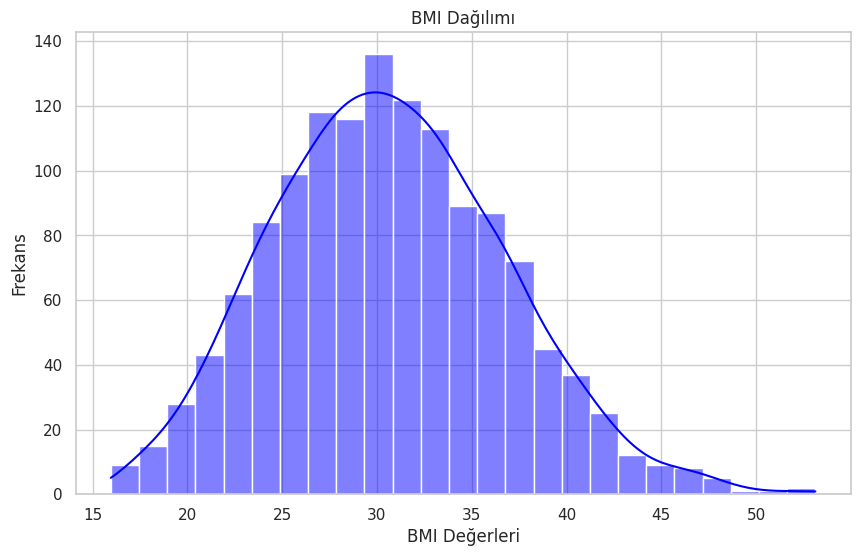

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data["bmi"], kde=True, color="blue")
plt.title("BMI Dağılımı")
plt.xlabel("BMI Değerleri")
plt.ylabel("Frekans")

plt.show()

In [27]:
#BMI değerlerinin normal dağılıma sahip olduğunu gözlemliyoruz

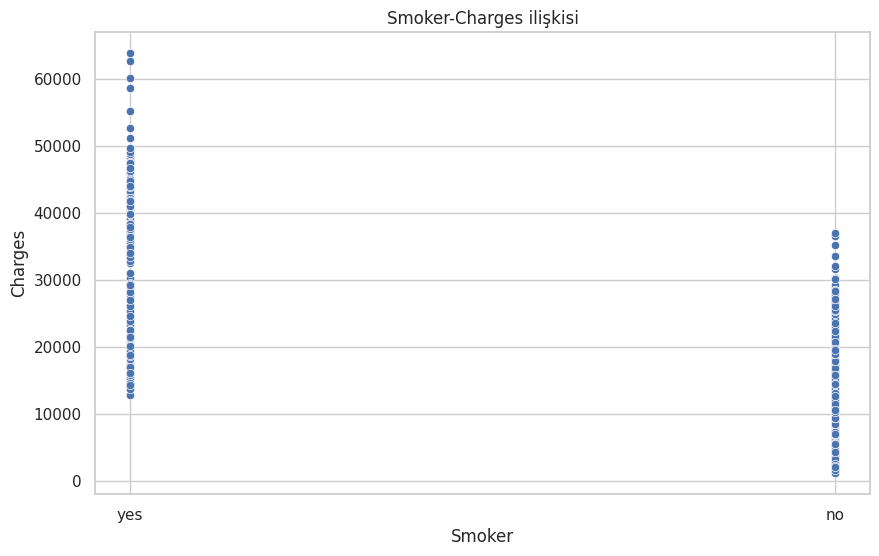

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


In [113]:
# Smoker-Charges ilişkisine bakıyorum
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="smoker", y="charges")
plt.title("Smoker-Charges ilişkisi")
plt.xlabel("Smoker")
plt.ylabel("Charges")

plt.show()

charges_by_smoker = data.groupby("smoker")["charges"].mean()
print(charges_by_smoker)

In [31]:
#yes olanların charges değeri no'ya göre çok fazla olur, bu durum smoker'ın outputdaki etkisinin çok fazla olduğunu gösterir

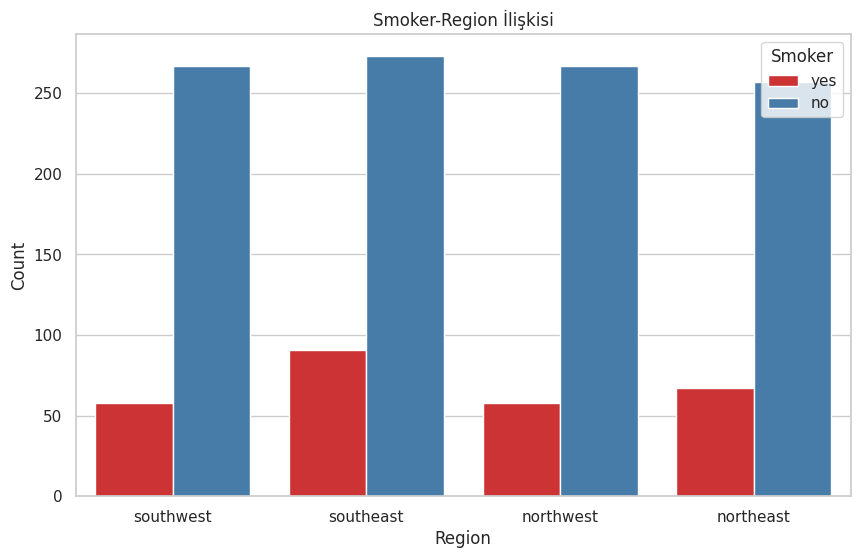

In [114]:
# Smoker ve region sütunları arasındaki ilişkiye

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="region", hue="smoker", palette="Set1")
plt.title("Smoker-Region İlişkisi")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title="Smoker", loc="upper right")

plt.show()

In [45]:
#yakın sayılarda değerler çıktığı için region'un output üzerinde önemli bir etkisi olmadığı gözlemlenir

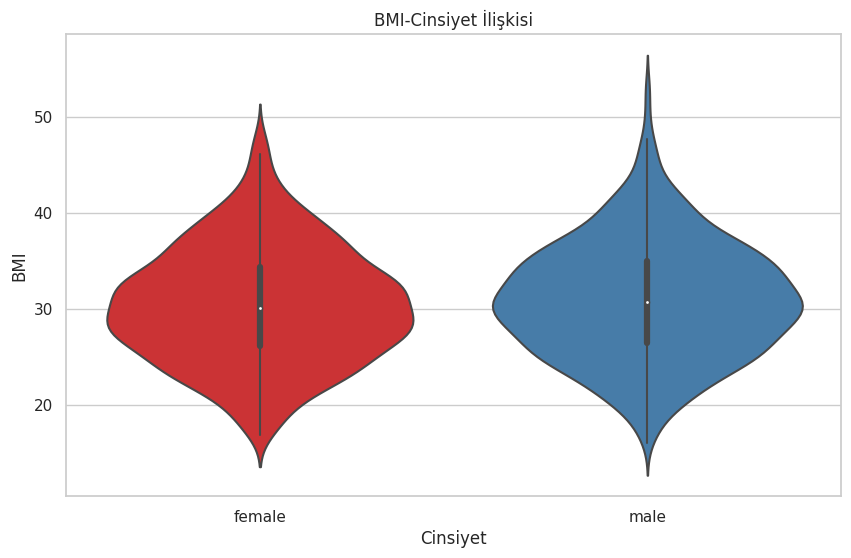

In [115]:
# BMI-cinsiyet ilişkisine bakıyorum
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x="sex", y="bmi", palette="Set1")
plt.title("BMI-Cinsiyet İlişkisi")
plt.xlabel("Cinsiyet")
plt.ylabel("BMI")

plt.show()

In [49]:
# Bölgelere göre çocuk dağılımına bakıyorum
children_by_region = data.groupby("region")["children"].sum()
print(f"Bölgelere göre çocuk dağılımı: {children_by_region}.")

Bölgelere göre çocuk dağılımı: region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64.


In [52]:
# En fazla çocuğun olduğu bölgeyi buluyorum
most_children_region = children_by_region.idxmax()

In [53]:
# Bu bölgede kaç çocuk olduğunu buluyorum
children_number = children_by_region.max()

In [54]:
print(f"En fazla çocuğun olduğu bölge: {most_children_region}, ve o bölgedeki çocuk sayısı: {children_number}.")

En fazla çocuğun olduğu bölge: southeast, ve o bölgedeki çocuk sayısı: 382.


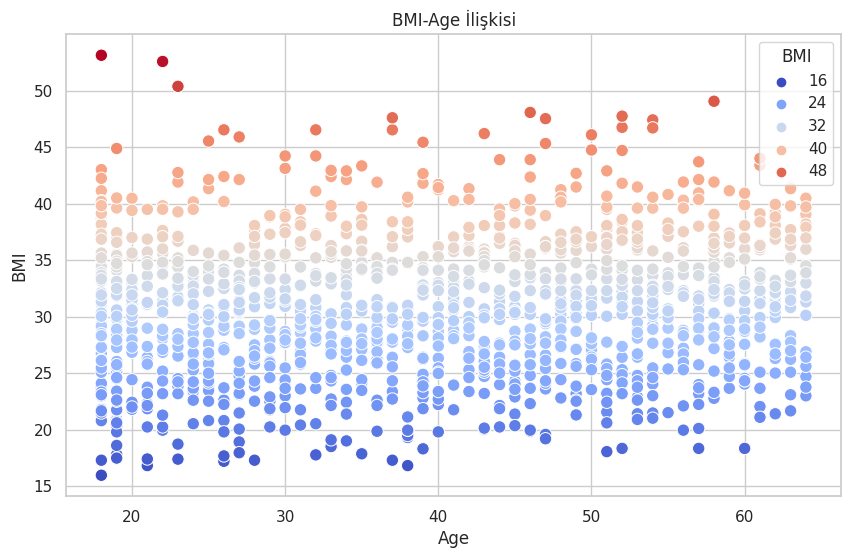

In [116]:
# BMI-yaş ilişkisine bakıyorum

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="age", y="bmi", hue="bmi", palette="coolwarm", s=80)
plt.title("BMI-Age İlişkisi")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title="BMI")

plt.show()

In [57]:
#yaş ile BMI arasında belirgin bir ilişki olmadığını gözlemliyoruz

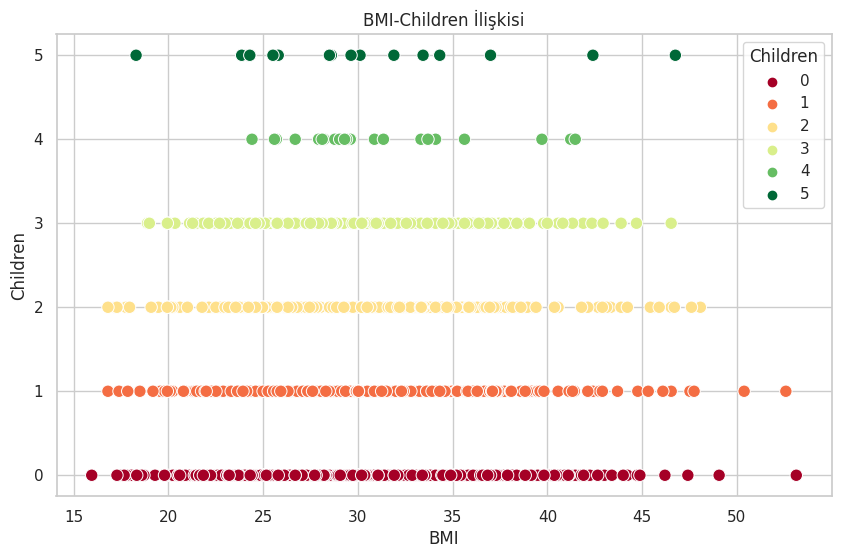

In [117]:
# BMI-Chidlren ilişkisini bakıyorum

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="bmi", y="children", hue="children", palette="RdYlGn", s=80)
plt.title("BMI-Children İlişkisi")
plt.xlabel("BMI")
plt.ylabel("Children")
plt.legend(title="Children")

plt.show()

In [59]:
#aynı şekilde çocuk sayısının da tekil olarak BMI ile kesin bir ilişkisi olmadığını gözlemliyoruz

In [60]:
#Cinsiyet-Sigara içme durumu ilişkisine bakıyorum

In [61]:
# bu ilişki özelinde bir crosstab oluşturuyorum
crosstab = pd.crosstab(data['sex'], data['smoker'])

In [62]:
# Yüzdelik olarak göstermesini ayarlıyorum
crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

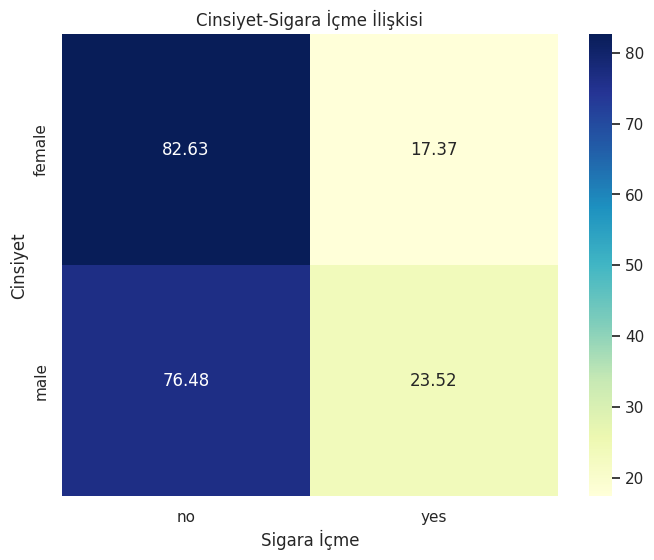

In [118]:
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_norm, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Cinsiyet-Sigara İçme İlişkisi')
plt.xlabel('Sigara İçme')
plt.ylabel('Cinsiyet')

plt.show()

In [66]:
#erkeklerin daha fazla içtiğini gözlemliyoruz. Cinsiyetin output üzerinde kritik seviyede olmayan bir etkisi olduğunu gözlemleyebiliriz.

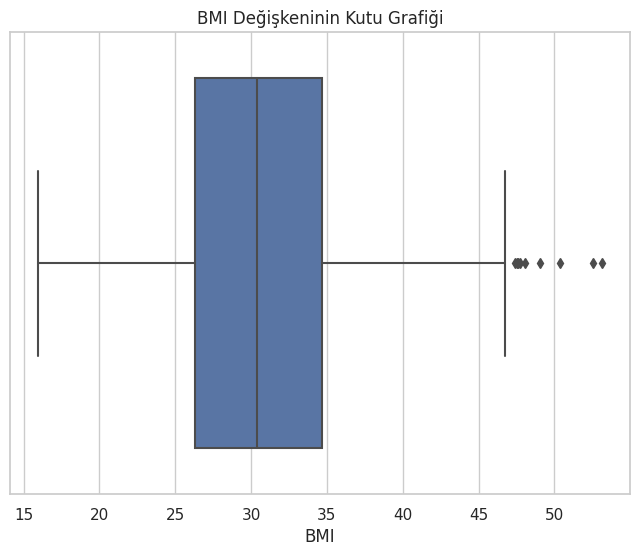

In [67]:
# Kutu grafiği ile BMI değişkeninin outlier değerinin varlığına bakıyorum.

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='bmi')
plt.title('BMI Değişkeninin Kutu Grafiği')
plt.xlabel('BMI')

plt.show()

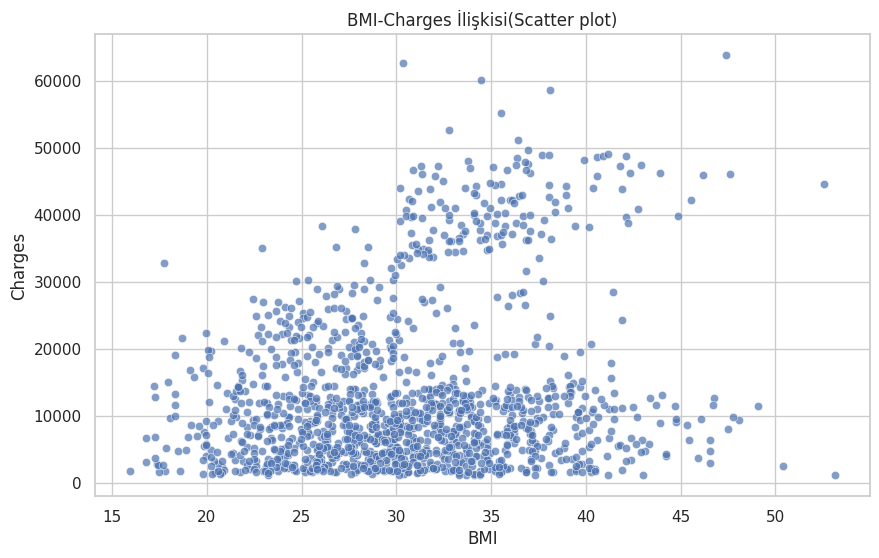

In [120]:
# Scatter plot ile bmi-charges ilişkisine bakıyorum

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bmi', y='charges', alpha=0.7)
plt.title('BMI-Charges İlişkisi(Scatter plot)')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.show()

In [69]:
#30 ve 40 BMI değerlerinde en yüksek charges değerlerini görsek bile çoğu BMI için charges değerlerine ulaşılabilmiştir.
#Bu durumda aralarında önemli olmayacak seviyede de olsa bir ilişki olduğu söylenebilir.

In [70]:
# Verileri gruplayarak ortalama BMI değerlerini hesaplatıyorum
bmi_by_region_smoker = data.groupby(['region', 'smoker'])['bmi'].mean().reset_index()

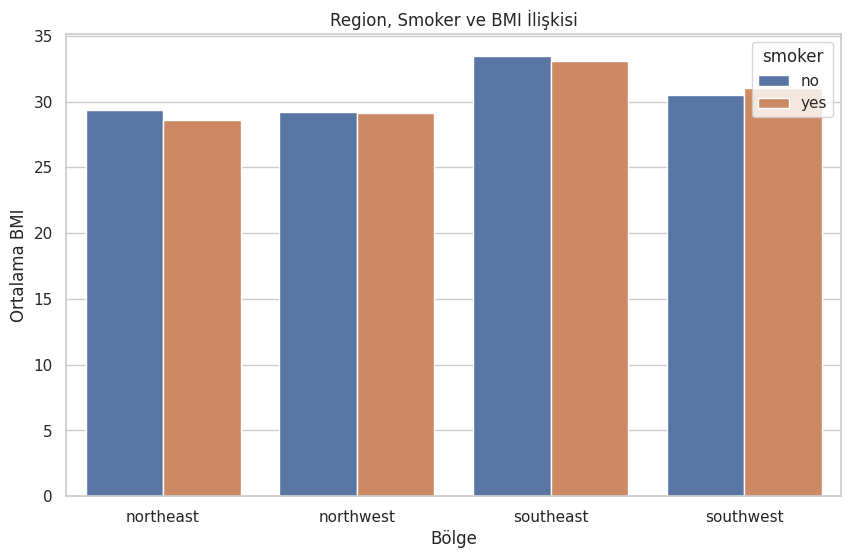

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(data=bmi_by_region_smoker, x='region', y='bmi', hue='smoker')
plt.title('Region, Smoker ve BMI İlişkisi')
plt.xlabel('Bölge')
plt.ylabel('Ortalama BMI')

plt.show()

In [72]:
#bölgeler ile içicilik oranının ilişkisi olmadığını ve bunların BMI'yı etkilemediğini gözlemliyoruz

In [75]:
# Kategorik verileri sayısal değerlere dönüştürüyorum
data2 = data.copy()

#cinsiyet
le = LabelEncoder()
le.fit(data2.sex.drop_duplicates())
data2.sex = le.transform(data2.sex)

# sigara içicilik durumu
le.fit(data2.smoker.drop_duplicates())
data2.smoker = le.transform(data2.smoker)

# bölgeler
le.fit(data2.region.drop_duplicates())
data2.region = le.transform(data2.region)

print(data2.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [ ]:
#One Hot Encoding işlemi norminal kategorik dataların dönüşümü için çokça kullanılır. Bu işlemi uyguluyorum.

In [77]:
# OneHotEncoder nesnesini oluşturuyorum
onehot_encoder = OneHotEncoder()

In [78]:
# kategorik sütunlarımı seçiyorum
categorical_columns = ['sex', 'smoker', 'region']

In [79]:
# Kategorik sütunları one-hot encoding ile dönüştürüyorum
encoded_features = onehot_encoder.fit_transform(data2[categorical_columns]).toarray()

In [80]:
#sonuçları bir DataFrame'e dönüştürüyorum
encoded_df = pd.DataFrame(encoded_features, columns= onehot_encoder.get_feature_names_out(categorical_columns))

In [87]:
# Veriseti ile birleştiriyorum
data2_encoded = pd.concat([data2, encoded_df], axis=1)

In [88]:
# Dönüşüm sonrası gereksiz sütunları kaldırıyorum
data2_encoded.drop(categorical_columns, axis=1, inplace=True)

In [93]:
# Veriyi kısa bir ismi olsun diye data3 değişkenine aktarıyorum
data3 = data2_encoded.copy()

In [95]:
#data3 değişkenine bakıyorum
print(data3.head())

   age     bmi  children      charges  sex_0  sex_1  smoker_0  smoker_1  \
0   19  27.900         0  16884.92400    1.0    0.0       0.0       1.0   
1   18  33.770         1   1725.55230    0.0    1.0       1.0       0.0   
2   28  33.000         3   4449.46200    0.0    1.0       1.0       0.0   
3   33  22.705         0  21984.47061    0.0    1.0       1.0       0.0   
4   32  28.880         0   3866.85520    0.0    1.0       1.0       0.0   

   region_0  region_1  region_2  region_3  
0       0.0       0.0       0.0       1.0  
1       0.0       0.0       1.0       0.0  
2       0.0       0.0       1.0       0.0  
3       0.0       1.0       0.0       0.0  
4       0.0       1.0       0.0       0.0  


In [96]:
# correlation matrisine bakıyorum

correlation_matrix = data3.corr()
charges_correlation = correlation_matrix['charges']

print(charges_correlation)

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
sex_0      -0.057292
sex_1       0.057292
smoker_0   -0.787251
smoker_1    0.787251
region_0    0.006349
region_1   -0.039905
region_2    0.073982
region_3   -0.043210
Name: charges, dtype: float64


In [97]:
#Correlation matrisinden de outputa en fazla etki eden smoker ilişkisi olduğunu görüyoruz

In [98]:
# Veri setini eğitim için hazırlıyorum
y = data3['charges']
X = data3.drop(['charges'], axis=1)

In [99]:
# Veriyi eğitim ve test kümelerine ayırıyorum
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
# Modelleri oluşturuyorum
models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    GradientBoostingRegressor(n_estimators=100, random_state=42),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    AdaBoostRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    ExtraTreeRegressor(random_state=42),
    xgb.XGBRegressor(n_estimators=100, random_state=42)
]

In [112]:
# Modelleri eğitiyorum ve performansı değerlendiriyorum
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print(f"Model: {model.__class__.__name__}")
    print("R² Score:", r2)
    print("Root Mean Squared Error:", rmse)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("++++++++++++++++++++++++++++++++++++++++++++")

Model: LinearRegression
R² Score: 0.7835929767120723
Root Mean Squared Error: 5796.2846592762735
Mean Absolute Error: 4181.194473753643
Mean Squared Error: 33596915.85136146
++++++++++++++++++++++++++++++++++++++++++++
Model: Lasso
R² Score: 0.7835348987579266
Root Mean Squared Error: 5797.062392287168
Mean Absolute Error: 4182.297003584162
Mean Squared Error: 33605932.380070224
++++++++++++++++++++++++++++++++++++++++++++
Model: Ridge
R² Score: 0.7834446266673823
Root Mean Squared Error: 5798.271036060347
Mean Absolute Error: 4187.302782980897
Mean Squared Error: 33619947.007616326
++++++++++++++++++++++++++++++++++++++++++++
Model: ElasticNet
R² Score: 0.542634268386539
Root Mean Squared Error: 8426.473144845164
Mean Absolute Error: 6382.342463514699
Mean Squared Error: 71005449.66079675
++++++++++++++++++++++++++++++++++++++++++++
Model: GradientBoostingRegressor
R² Score: 0.8792771669587912
Root Mean Squared Error: 4329.210862471454
Mean Absolute Error: 2405.7538884837604
Mean Squa

In [ ]:
#En başarılı sonuucu Gradient Boosting Regressor ile almış olsam da Random Forest Regressor vb farklı regresyon modelleri için de yeterli seviyede R2 skorları elde ettim